In [19]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
from pytrends.request import TrendReq



Setup pytrend and Define keyword

In [20]:
# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)
keyword = 'Cloud computing'


Data Request

In [21]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

Country Wise Intrest

In [22]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

draw graph for visualization

C:\Users\rohit\AppData\Local\Temp\ipykernel_4956\893088331.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




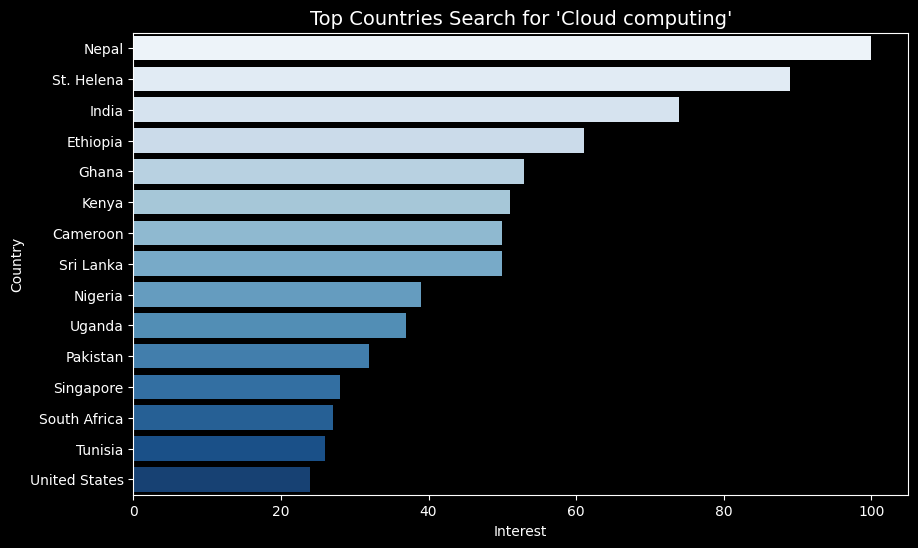

In [23]:

# Plot Barplot using Seaborn
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
sns.barplot(
    x=region_data[keyword],
    y=region_data.index,
    palette="Blues"
)
plt.title(f"Top Countries Search for '{keyword}'", color="white", fontsize=14)
plt.xlabel("Interest", color="white")
plt.ylabel("Country", color="white")
plt.show()

In [24]:
# 2️⃣ World Map (Choropleth) Visualization
# -----------------------------
# Example Data
region_data_map = pd.DataFrame({
    "Country": ["India", "United States", "United Kingdom", "Germany", "Canada"],
    "Interest": [90, 80, 75, 60, 50]
})

# Convert Country Names -> ISO-3 Codes
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

region_data_map["ISO-3"] = region_data_map["Country"].apply(get_iso3)

# Plot Choropleth Map using Plotly
fig = px.choropleth(
    region_data_map,
    locations="ISO-3",
    color="Interest",
    hover_name="Country",
    title="World Map of Interest",
    color_continuous_scale="Blues"
)
fig.show()


Time Wise Interest

c:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



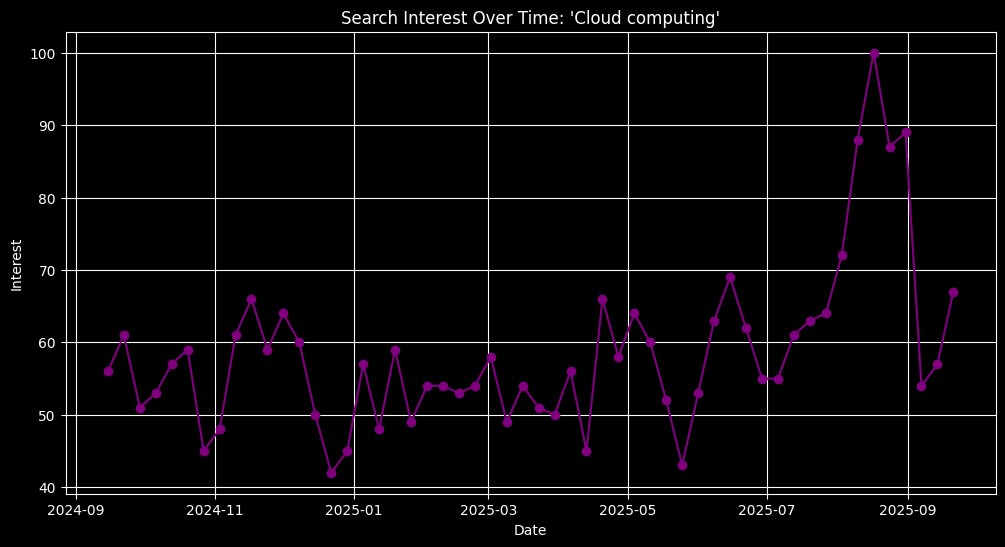

In [25]:
# 3️⃣ Search Interest Over Time for a Single Keyword
time_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time: '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

Multiple Keyword Compare

c:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



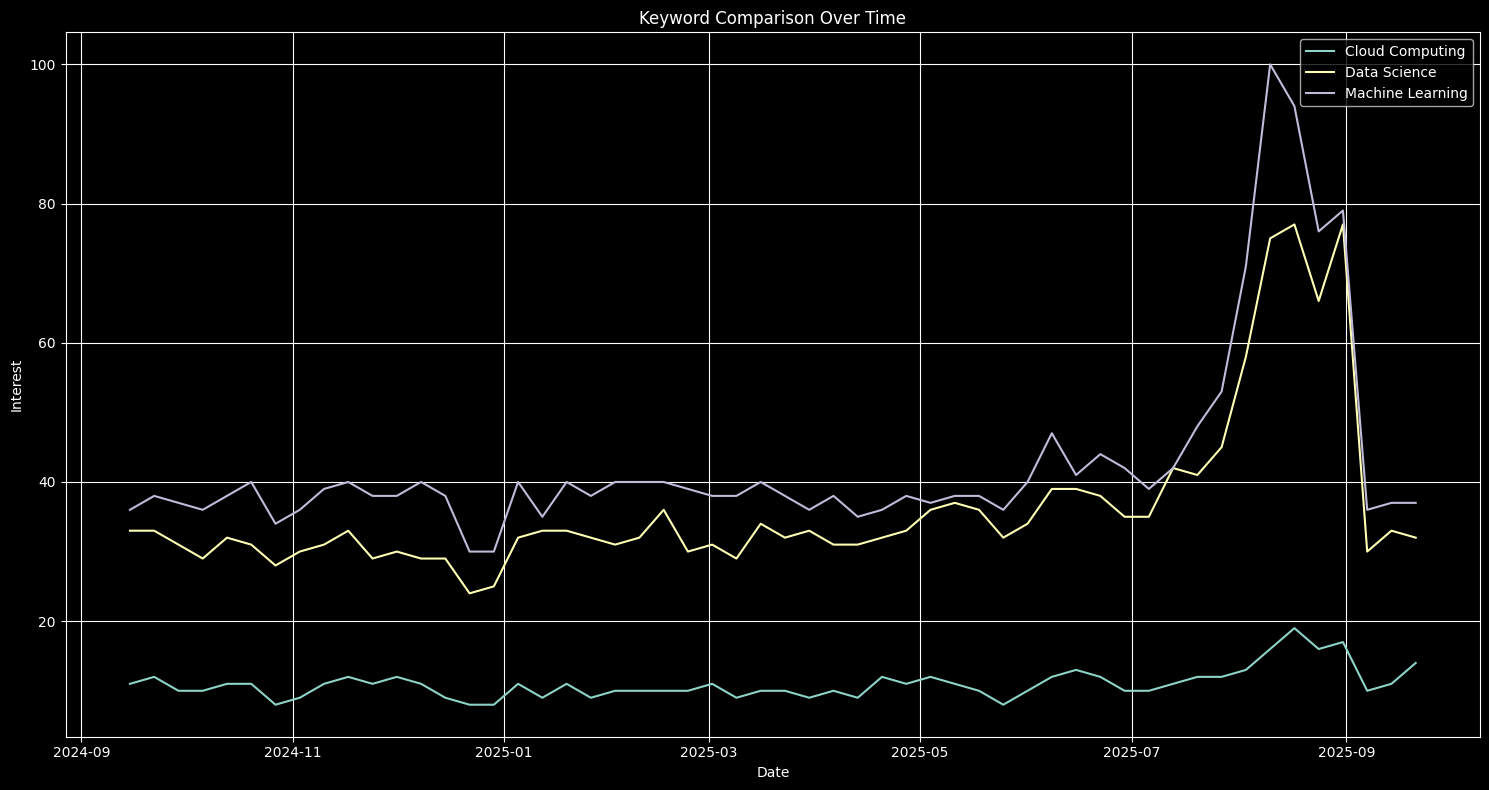

In [26]:
key_words = ["Cloud Computing", "Data Science", "Machine Learning"]
pytrends.build_payload(key_words, cat=0, timeframe='today 12-m', geo='', gprop='')
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(15,8))
for kw in key_words:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()